# Introduction

Nowadays, commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (remember time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this project, we will try to build an automatic credit card approval predictor using machine learning technique, just like the real banks do. 

Essentially, predicting wheter a credit card application will be approved or not is a classification task. We will use a simple learning algorithm, i.e. Logistic Regression to predict the credit card approvals. Logistic Regression is pretty robust algorithm when we deal with linearly separable dataset. This model is also very easy to interpret.

<img src="image/credit-card.jpg" width="450">

## Objective

- To build a machine learning model to predict if a credit card application will get approved or not.
- To get some insights about the driver of approving credit card application.

## Business value

- We could help banks to predict credit card approval automatically.
- We could identify the reason of approving credit card application.

## Methodology

- Learning algorithm using Logistic Regression.
- Exploratory Data Analysis.

## The dataset

The dataset used in this project is the [Credit Card Approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository. This file concerns real world credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

The features of this dataset have been anonymized to protect the privacy, but I found this [blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) is very useful because it gives us a pretty good overview of the expected name of anonymized features and its values.

Based on the blog mentioned above, the features that may exist in a typical credit card application are `Gender`, `Age`, `Debt`, `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, `YearsEmployed`, `PriorDefault`, `Employed`, `CreditScore`, `DriversLicense`, `Citizen`, `ZipCode`, `Income` and finally the `ApprovalStatus`. These gives us a pretty good starting point, so we can map these features with respect to the columns in the original dataset.

Attribute information:
- `A1` as `Gender`: b, a.
- `A2` as `Age`: continuous.
- `A3` as `Debt`: continuous.
- `A4` as `Married`: u, y, l, t.
- `A5` as `BankCustomer`: g, p, gg.
- `A6` as `EducationLevel`: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- `A7` as `Ethnicity`: v, h, bb, j, n, z, dd, ff, o.
- `A8` as `YearsEmployed`: continuous.
- `A9` as `PriorDefault`: t, f.
- `A10` as `Employed`: t, f.
- `A11` as `CreditScore`: continuous.
- `A12` as `DriversLicense`: t, f.
- `A13` as `Citizen`: g, p, s.
- `A14` as `ZipCode`: continuous.
- `A15` as `Income`: continuous.
- `A16` as `ApprovalStatus`: +,- (class attribute)

# Load the dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv("dataset/crx.data", header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Data Cleaning

## Raname the columns and their values

We will rename the columns and also its values by following the reference from this [blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html).

Some of the value names from columns such as `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, and `Citizen` are quite hard to be deduced because their values are very granular. So we won't change those value names.

In [3]:
# map the variable names of the columns
col_names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
            'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
            'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
df.columns = col_names

In [4]:
# change the value names to make it more readable
df['Gender'].replace({'a':'Male', 'b':'Female'}, inplace = True)
df['ApprovalStatus'].replace({'+':'Yes', '-':'No'}, inplace = True)
df['PriorDefault'].replace({'t':'True', 'f':'False'}, inplace = True)
df['Employed'].replace({'t':'True', 'f':'False'}, inplace = True)
df['DriversLicense'].replace({'t':'True', 'f':'False'}, inplace = True)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,Female,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,00202,0,Yes
1,Male,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,00043,560,Yes
2,Male,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,00280,824,Yes
3,Female,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,00100,3,Yes
4,Female,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,00120,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Female,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,00260,0,No
686,Male,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,00200,394,No
687,Male,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,00200,1,No
688,Female,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,00280,750,No


## Check data types

- `Age` is represented as an `object` dtype.
    - &rarr; convert to `float` dtype.

In [5]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
# convert age column to numeric dtype
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')
df['Age'].dtype

dtype('float64')

## Check missing values

- There are some missing values represented as `"?"` in `Gender`, `Married `, `BankCustomer`, `EducationLevel`, `Ethnicity`, and `ZipCode` columns.
    - &rarr; impute using their mode value.
- There are some missing values in `Age` column.
    - &rarr; impute using its mean value.

In [7]:
# check unique values in categorical columns to seek hidden missing values
cat_columns = df.dtypes[df.dtypes == 'object'].index
for col in cat_columns:
    print('='*50, col,'='*50)
    print(df[col].unique())

================================================== Gender ==================================================
['Female' 'Male' '?']
================================================== Married ==================================================
['u' 'y' '?' 'l']
================================================== BankCustomer ==================================================
['g' 'p' '?' 'gg']
================================================== EducationLevel ==================================================
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
================================================== Ethnicity ==================================================
['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
================================================== PriorDefault ==================================================
['True' 'False']
================================================== Employed ==================================================
['True' 'False']
========

In [8]:
# check missing values in numerical columns
num_columns = df.dtypes[df.dtypes != 'object'].index
df[num_columns].isnull().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
Income            0
dtype: int64

In [9]:
# impute missing values in 'Age' by its mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
# impute missing values in 'Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', and 'ZipCode' by their mode
from scipy.stats import mode
for col in ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'ZipCode']:
    df[col] = df[col].replace({'?':df[col].mode()[0]})

## Check duplicates

In [11]:
# check duplicate rows
df[df.duplicated()]

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus


# Exploratory Data Analysis (EDA)

## General data distribution

There are two types of data, that are `num_columns` and `cat_columns` which consist of numerical and categorical data respectively.

`ZipCode` is removed since it has too many unique values.

In [12]:
num_columns = list(num_columns)
num_columns

['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']

In [13]:
cat_columns = list(cat_columns)
cat_columns

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'ApprovalStatus']

In [14]:
# remove 'ZipCode'
cat_columns = [col for col in cat_columns if col not in ['ZipCode']]

### Numerical columns

- As we can see there are many outliers in this dataset but these outliers seem to be within ranges that are still understandable and acceptable. 
- All of the the numerical columns seem to have positively skewed distribution. We should transform this features to make them normally distributed since we are going to use Logistic Regression learning algorithm.

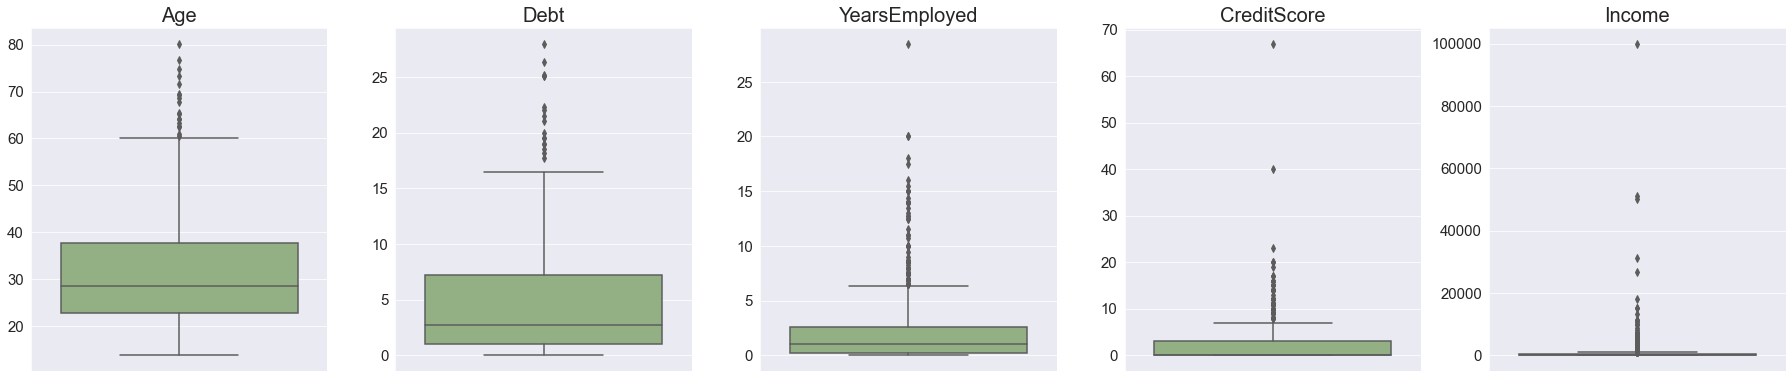

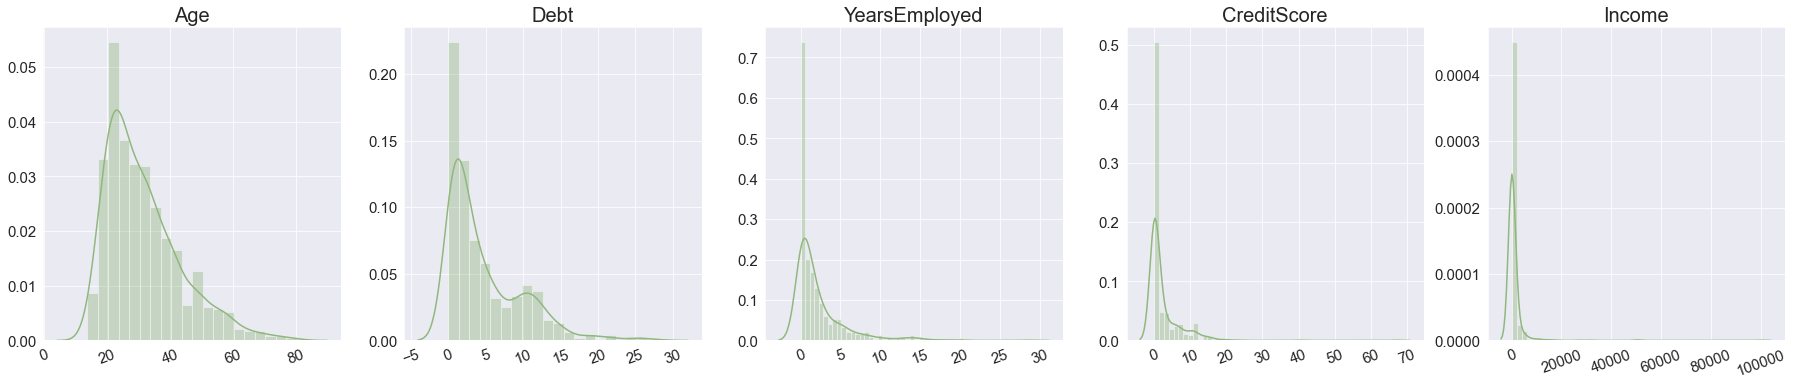

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [15]:
# 'num_columns' data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[num_columns].columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = df[col], color = '#90B77D')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[num_columns].columns:
    plt.subplot(5, 5, i)
    ax = sns.distplot(x = df[col], color = '#90B77D')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

# compute the descriptive stats of 'num_columns'
df[num_columns].describe()

### Categorical columns

- `Gender`: most of the applicants are female.
- `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, and `Citizen` are hardly to interpret since the value names are anonymized.
- `PriorDefault`: the distribution is relatively even.
- `Employed`: more credit card applicants don't have a job.
- `DriversLicense`: the distribution is relatively even.
- `ApprovalStatus`: the class is relatively balanced.

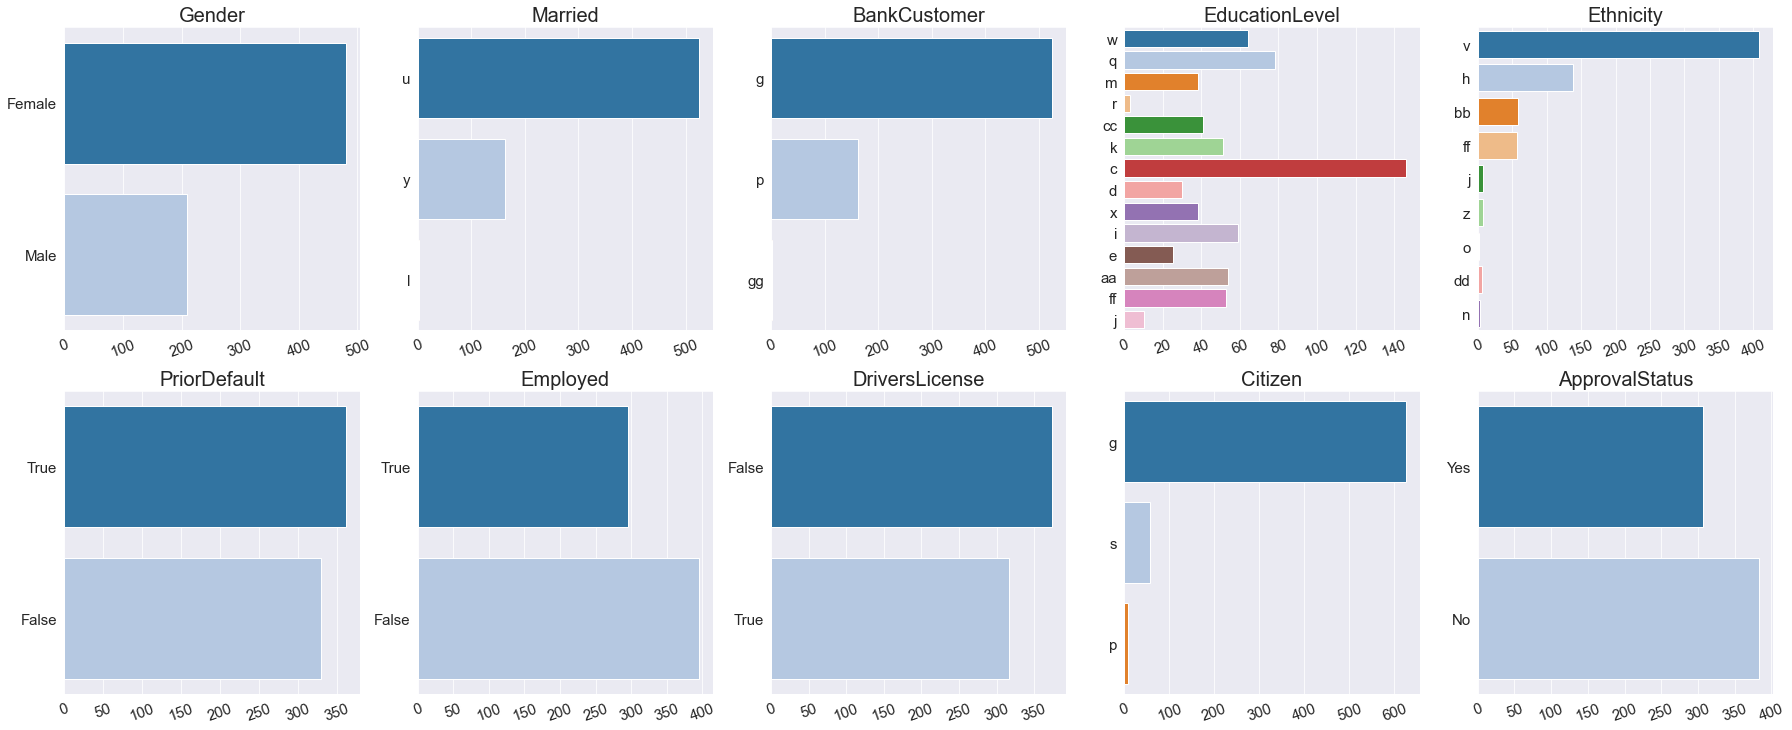

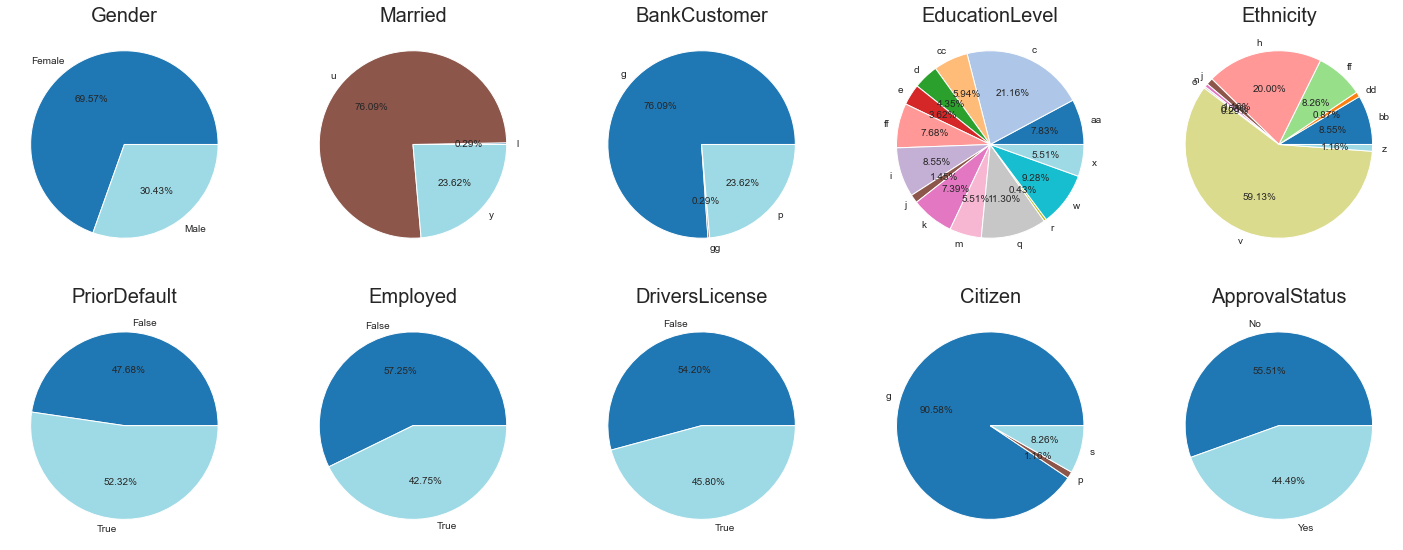

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ApprovalStatus
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,Female,u,g,c,v,True,False,False,g,No
freq,480,525,525,146,408,361,395,374,625,383


In [16]:
# 'cat_columns' data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[cat_columns].columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = df[cat_columns], y = df[col], palette = 'tab20')
    
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[cat_columns].columns:
    plt.subplot(5, 5, i)
    ax = df.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', colormap = 'tab20')
    
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    i += 1
plt.show()

# compute the descriptive stats of 'cat_columns'
df[cat_columns].describe()

## Data distribution of whether the CC application is approved or not

### Numerical columns

- It looks like the higher the `Age`, `Debt`, `YearsEmployed`, `CreditScore`, and `Income` then the more likely credit card application will be approved. This is an expected and reasonable condition on approved CC.
- Later, we will perform hypothesis testing using ANOVA Test to check whether the differences of mean between approved CC and not approved CC are statistically significant or not.

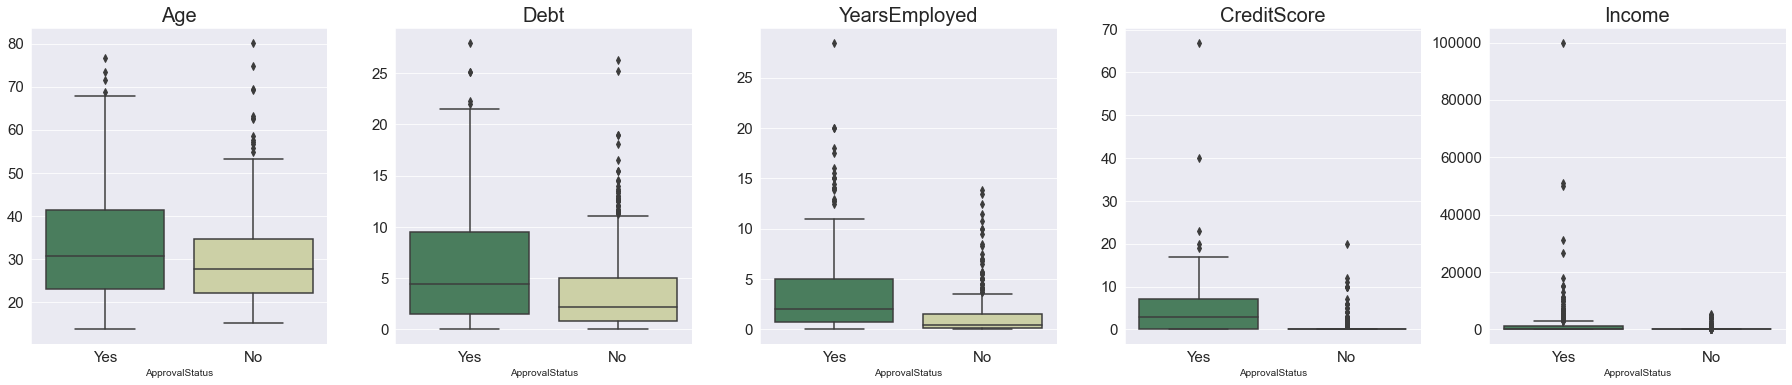

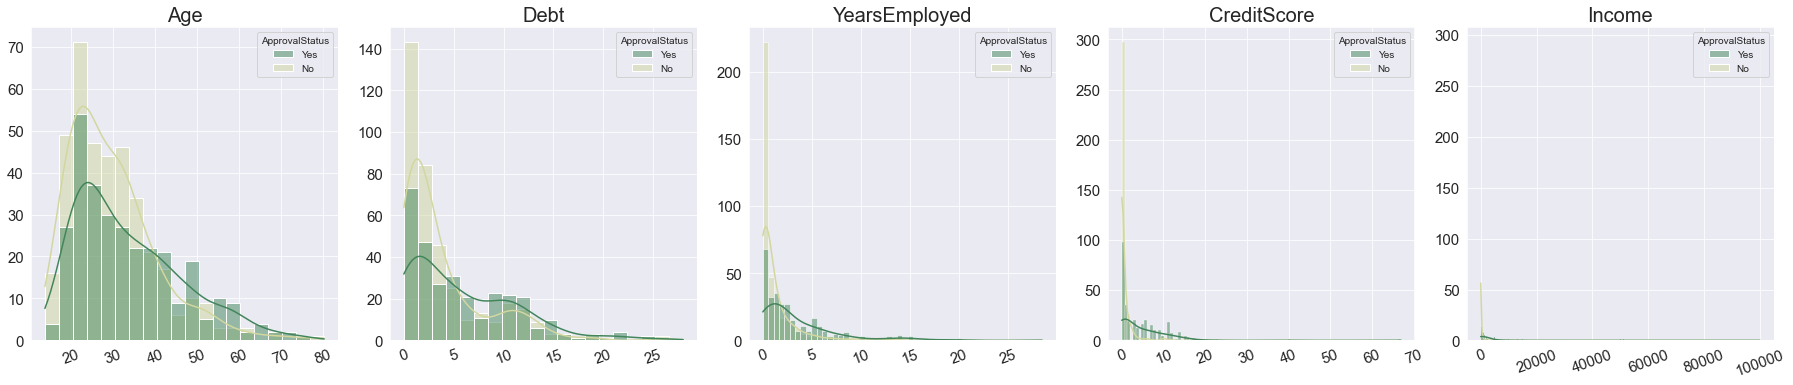

,Age,Debt,YearsEmployed,CreditScore,Income
ApprovalStatus,,,,,
No,29.854182,3.839948,1.257924,0.631854,198.605744
Yes,33.706470,5.904951,3.427899,4.605863,2038.859935


In [17]:
# 'num_columns' data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[num_columns].columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = df[col], x = df['ApprovalStatus'], palette = ['#42855B', '#D2D79F'])

    ax.set(ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 0, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[num_columns].columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df[col], hue = df['ApprovalStatus'], palette = ['#42855B', '#D2D79F'], kde = True)
    
    ax.set(ylabel = None, xlabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

df[num_columns + ['ApprovalStatus']].groupby('ApprovalStatus').agg('mean')

### Categorical columns

- `Gender`: seems "Male" applicants are more likely to be approved. Perhaps "Male" applicants are more likely having a job compared to "Female".
- `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, and `Citizen` are hardly to interpret since the value names are anonymized.
- `PriorDefault`: having no default status (`PriorDefault` = "True") is more likely to be approved.
- `Employed`: having a job (`Employed` = "True") is more likely to be approved.
- `DriversLicense`: having a driver license is relatively to be approved compared to not having driver license. Perhaps having a driver license denotes the applicant owns a vehicle and has good financial capabilities.
- `ApprovalStatus`: the class is relatively balanced.

Next, we will also perform hypothesis testing using Chi-Squared Test to check wheter the relation between `ApprovalStatus` and each categorical feature is statistically independent or not.

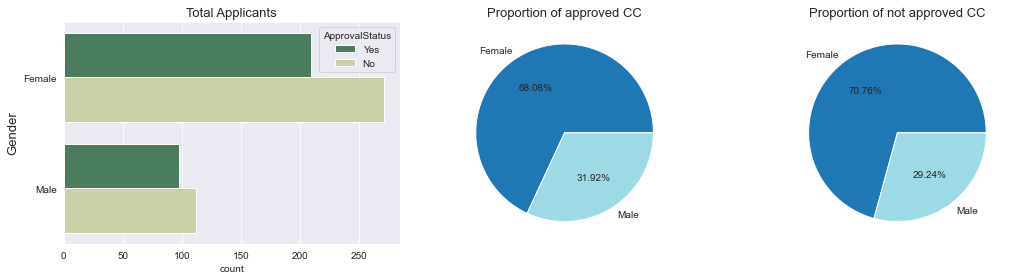

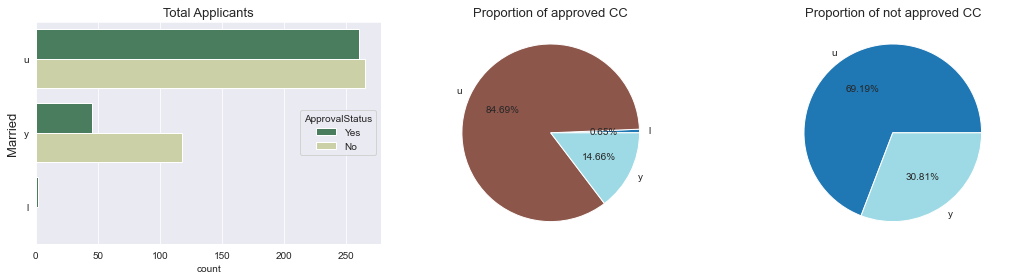

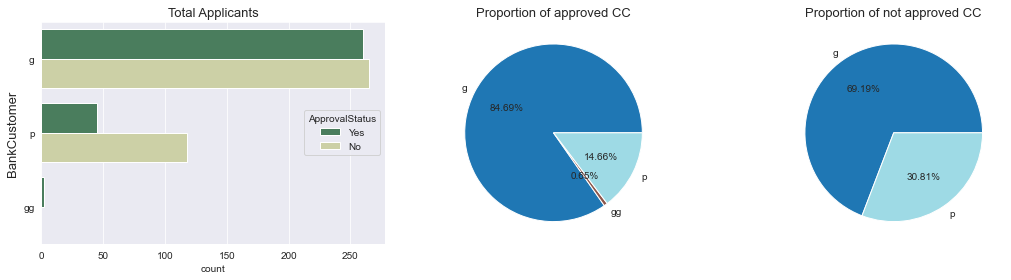

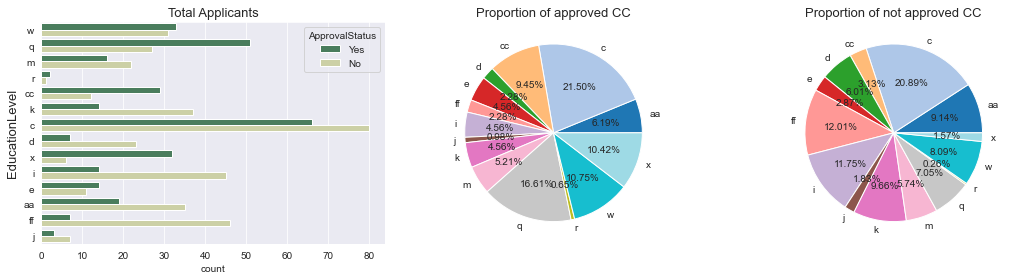

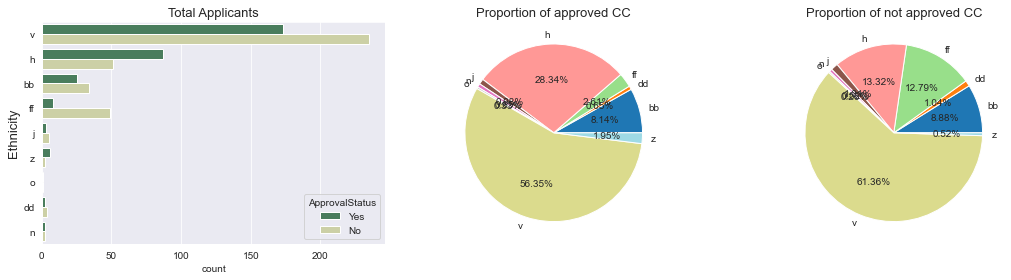

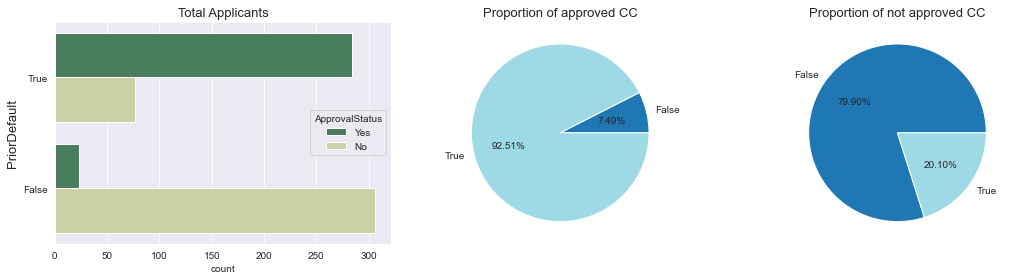

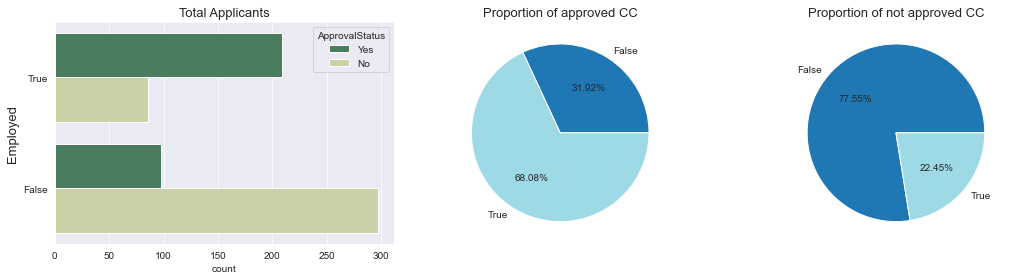

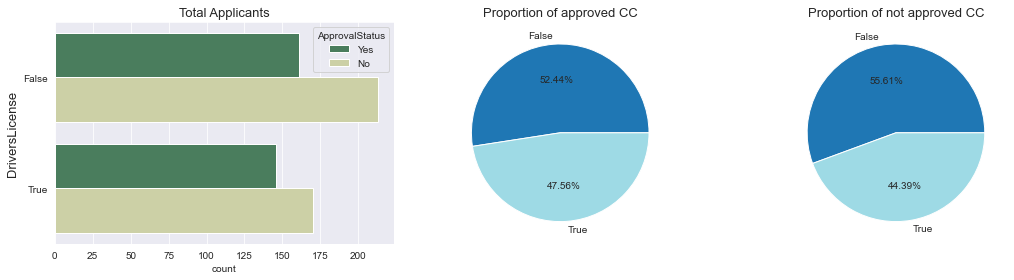

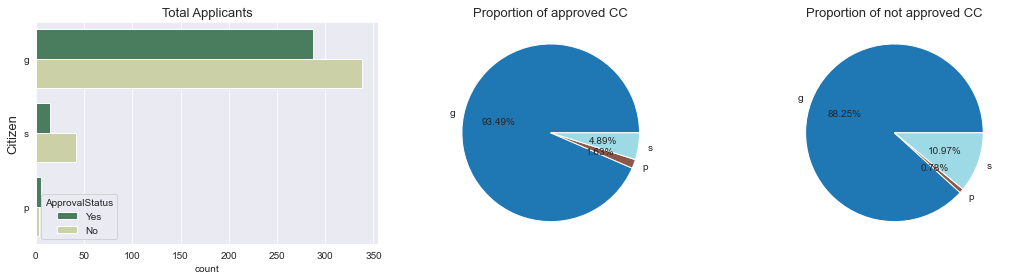

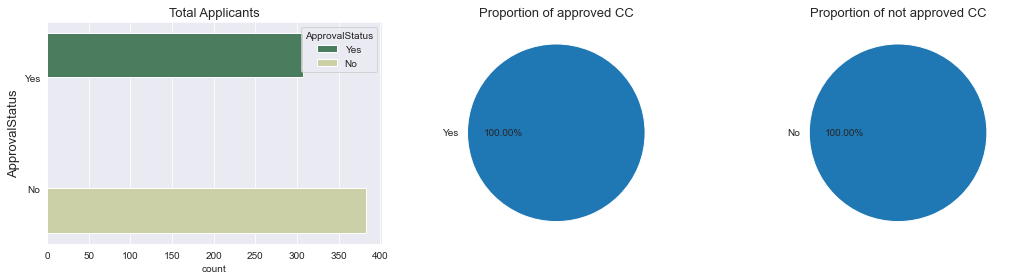

In [18]:
# 'cat_columns' data
for col in df[cat_columns].columns:
    fig, ax = plt.subplots(figsize = (15, 4), ncols = 3, nrows = 1)
    
    # plot 1: countplot
    sns.countplot(data = df, y = df[col], hue = 'ApprovalStatus', ax = ax[0], palette = ['#42855B', '#D2D79F'])
    ax[0].set_title('Total Applicants', loc = 'center', fontsize = 13)
    ax[0].set_ylabel(str(col), fontsize = 13)
    
    # plot 2: proportion of approved
    _ = df[df['ApprovalStatus'] == 'Yes']
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[1], colormap = 'tab20')
    ax[1].set(xlabel = None, ylabel = None)
    ax[1].set_title('Proportion of approved CC', loc = 'center', fontsize = 13)
    
    # plot 3: proportion of not approved
    _ = df[df['ApprovalStatus'] == 'No']
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[2], colormap = 'tab20')
    ax[2].set(xlabel = None, ylabel = None)
    ax[2].set_title('Proportion of not approved CC', loc = 'center', fontsize = 13)
    
    plt.tight_layout()
    plt.show()

## Hypothesis testing

### ANOVA Test

While conducting the ANOVA Test, There will be 2 hypotheses i.e the Null Hypothesis and the Alternate Hypothesis.

1. H0 (Null Hypothesis): All the sample means are equal, or they don’t have any significant difference (**independent**).
2. H1 (Alternate Hypothesis): At least one sample mean are different from others, or they have significant difference (**dependent**).

One of the results of the test is p-value where this value can be interpreted to reject or fail to reject the assumption or null hypothesis. In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

1. If p-value <= alpha: significant result, reject null hypothesis (H0) &rarr; **dependent**.
2. If p-value > alpha: not significant result, fail to reject null hypothesis (H0) &rarr; **independent**.

In [19]:
# helper function to perform ANOVA test
import pingouin
def ANOVA_test(df, columns, target, alpha = 0.05):
    p_value = []
    result = []
    temp = []
    for col in columns:
        anova_results = pingouin.anova(data = df, dv = col, between = target)
        p = anova_results['p-unc'][0]
        temp.append(col)
        
        # assign the result 
        if abs(p) <= alpha:
            result.append('reject H0')
        else:
            result.append('fail to reject H0')
            
        # assign the p-value
        p_value.append(p)
    output = pd.DataFrame({'p_value':p_value, 'result':result}, index = temp)
    output.index.name = '"ANOVA Test"'
    output.columns.name = target
    return output

In [20]:
# perform ANOVA test on 'num_columns'
ANOVA_results = ANOVA_test(df, num_columns, 'ApprovalStatus', alpha = 0.05)
ANOVA_results.sort_values('p_value')

ApprovalStatus,p_value,result
"""ANOVA Test""",,
CreditScore,7.957719e-29,reject H0
YearsEmployed,3.671054e-18,reject H0
Debt,4.551681e-08,reject H0
Income,3.452026e-06,reject H0
Age,1.990220e-05,reject H0


Insights:
- `Age`, `Debt`, `YearsEmployed`, `CreditScore`, and `Income` are significant features. Their differences of mean between approved CC and not approved CC are statistically significant.

### Chi-Squared Test

While conducting the Chi-Squared Test, we have to initially consider 2 hypotheses i.e the Null Hypothesis and the Alternate Hypothesis.
1. H0 (Null Hypothesis): The 2 variables to be compared are **independent**, if the observed and expected frequencies are similar.
2. H1 (Alternate Hypothesis): The 2 variables to be compared are **dependent**, if the observed and expected frequencies are dissimilar.

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same. In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

1. If p-value <= alpha: significant result, reject null hypothesis (H0) &rarr; **dependent**.
2. If p-value > alpha: not significant result, fail to reject null hypothesis (H0) &rarr; **independent**.

In [21]:
# helper function to perform chi-squared test
from scipy.stats import chi2_contingency, chi2
def chi_squared_test(df, crosstab_table, target, prob = 0.95):
    result = crosstab_table.copy()
    p_value = crosstab_table.copy()
    for index in crosstab_table.index:
        for column in crosstab_table.columns:
            # contingency table
            temp_table = pd.crosstab(df[index], df[column])
            
            # perform Chi-Squared Test from contingency table
            stat, p, dof, expected = chi2_contingency(temp_table)
            
            # compute the critical value
            critical = chi2.ppf(prob, dof)
            
            # assign the result 
            if abs(stat) >= critical:
                result.loc[index, column] = 'reject H0'
            else:
                result.loc[index, column] = 'fail to reject H0'
            
            # assign the p-value
            p_value.loc[index, column] = p
            
    output = pd.concat([p_value.loc[:, [target]], result.loc[:, [target]]], axis = 1)
    output.index.name = '"Chi-Squared Test"'
    output.columns = ['p_value', 'result']
    output.columns.name = target
    return result, p_value, output

In [22]:
# perform chi-squared test on 'cat_columns'
crosstab_table = pd.crosstab(df[cat_columns].columns, 
                             df[cat_columns].columns)
result, p_value, chi_squared_test_results = chi_squared_test(df, crosstab_table, target = 'ApprovalStatus', prob = 0.95)
chi_squared_test_results.sort_values('p_value')

ApprovalStatus,p_value,result
"""Chi-Squared Test""",,
ApprovalStatus,3.384782e-151,reject H0
PriorDefault,3.118590e-79,reject H0
Employed,5.675727e-33,reject H0
EducationLevel,3.502987e-15,reject H0
Ethnicity,3.649917e-07,reject H0
BankCustomer,1.597851e-06,reject H0
Married,1.597851e-06,reject H0
Citizen,1.009429e-02,reject H0
DriversLicense,4.509459e-01,fail to reject H0


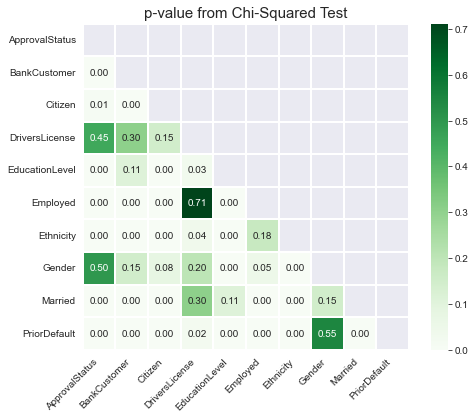

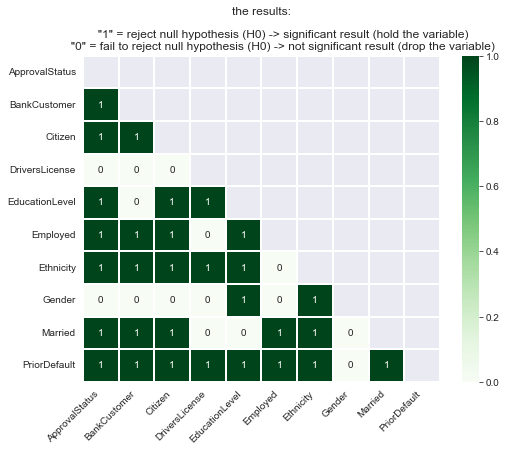

In [23]:
# plot 'p_value' with heatmap 
fig, ax = plt.subplots(figsize=(8, 6))
mask = np.zeros_like(p_value)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(p_value, annot = True, fmt = '.2f', cmap = 'Greens', linewidths = 0.1,  mask = mask, square = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
ax.set(xlabel = None, ylabel = None)
plt.title('p-value from Chi-Squared Test', size = 15)
plt.show()

# plot 'result' with heatmap 
fig, ax = plt.subplots(figsize=(8, 6))
mask = np.zeros_like(result == 'reject H0')
mask[np.triu_indices_from(mask)] = True
sns.heatmap(result == 'reject H0', annot = True, fmt = '.0f', cmap = 'Greens', linewidths = 0.1,  mask = mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
ax.set(xlabel = None, ylabel = None)
plt.title('''the results:\n
             "1" = reject null hypothesis (H0) -> significant result (hold the variable)
             "0" = fail to reject null hypothesis (H0) -> not significant result (drop the variable)''')
plt.show()

In [24]:
# select the significant predictor variables
temp = (result == 'reject H0').loc['ApprovalStatus',:]
temp = list(temp[temp].index)
temp.remove('ApprovalStatus')

cat_columns_significant = [col for col in cat_columns if col in temp]
cat_columns_significant

['Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'Citizen']

Insights:
- `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, `PriorDefault`, `Employed`, and `Citizen` are significant features for `ApprovalStatus`.
- `DriversLicense` and `Gender` seems to be not affecting the `ApprovalStatus`.

## Linear relationship

### Pearson correlation

pearson correlation of `cat_columns`:
- `PriorDefault` and `Employed` have quite strong positive correlation with `ApprovalStatus`. These look like reasonable relationship.
- `DriversLicense` and `Gender` have the lowest negative correlation with `ApprovalStatus`. In fact, from the Chi-Squared Test, those features are not significant.
- `BankCustomer` -- `Married` are correlated each other with the highest correlation value, `1`.
- `EducationLevel` -- `Ethnicity` and `Employed` -- `PriorDefault` are correlated each other with moderate correlation value, `±0.4`.

pearson correlation of `num_columns`:
- `CreditScore` and `YearsEmployed` have moderate correlation with `ApprovalStatus`. These features are greatly affecting `ApprovalStatus` compared to other features.

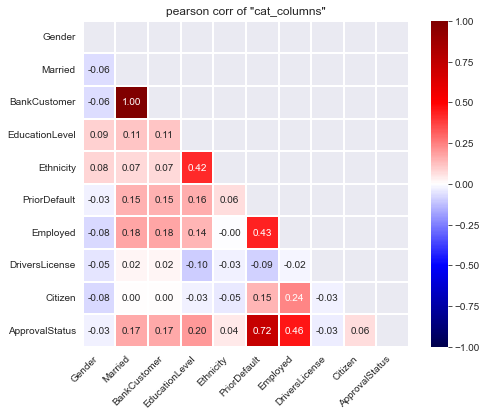

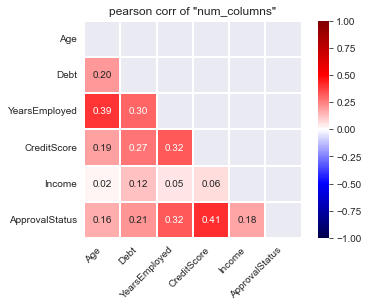

In [25]:
# pearson correlation of 'cat_columns'
fig, ax = plt.subplots(figsize = (8, 6))
cat_correlation = df[cat_columns].apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.zeros_like(cat_correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cat_correlation, annot = True, fmt = '.2f', cmap = 'seismic', 
            linewidths = 0.1,  mask = mask, vmin = -1, vmax = 1, square = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
plt.title('pearson corr of "cat_columns"')
plt.show()

# pearson correlation of 'num_columns'
fig, ax = plt.subplots(figsize = (6, 4))
df_num_to_target = df[num_columns + ['ApprovalStatus']]
df_num_to_target['ApprovalStatus'] = df_num_to_target['ApprovalStatus'].apply(lambda x: 1 if x == 'Yes' else 0)
num_correlation = df_num_to_target.corr()

mask = np.zeros_like(num_correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(num_correlation, annot = True, fmt = '.2f', cmap = 'seismic', 
            linewidths = 0.1,  mask = mask, vmin = -1, vmax = 1, square = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
plt.title('pearson corr of "num_columns"')
plt.show()

### Pair plot
- Seems there is a trend where the higher `CreditScore` and `YearsEmployed`, then the more likely CC gets approve.

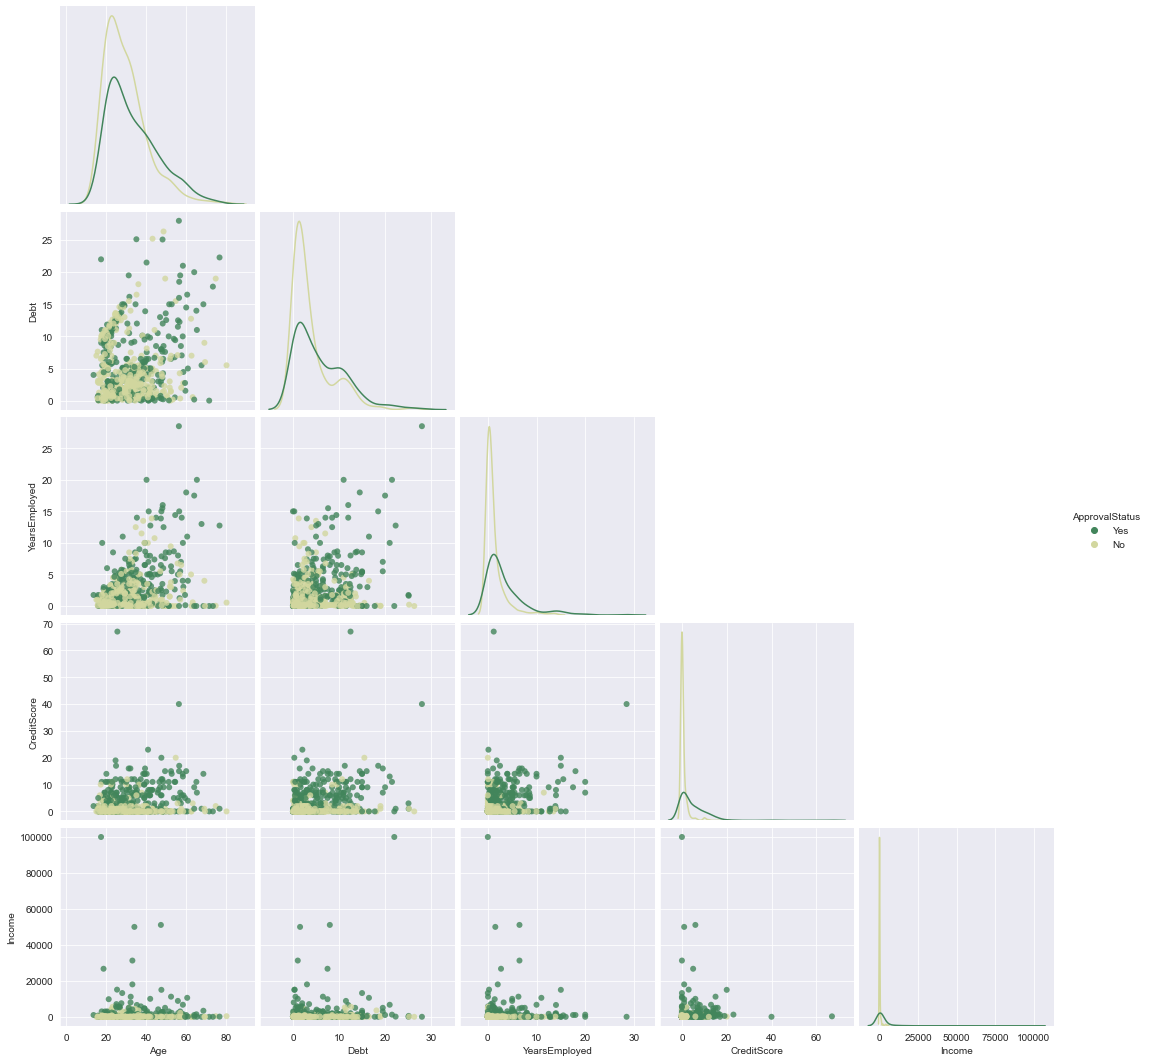

In [26]:
# pair plot of 'num_columns'
sns.pairplot(data = df[num_columns + ['ApprovalStatus']], hue = 'ApprovalStatus', height = 3, palette = ['#42855B', '#D2D79F'],
             plot_kws = dict(marker = "o", alpha = 0.8, edgecolor = 'none'),
             diag_kws = dict(fill = False),
             corner = True)
plt.show()

## Deep-dive EDA

### ApprovalRate across each categorical features

We will set the `Age`, `Debt`, `YearsEmployed`, `CreditScore`, `Income`, and also `NumberofApplicants` as primary metrics, then `ApprovalRate` as the secondary metric. Each of the combination from primary and secondary metrics will be plotted as y-axis and for the x-axis will be `PriorDefault` and `Employed` features since these features are having very low p-values.

In [27]:
# create new column for numerical approval status
df['ApprovalRate'] = df['ApprovalStatus'].apply(lambda x: 1 if x == 'Yes' else 0)

# create new column for counting the number of applicants
df['NumberofApplicants'] = 1

In [28]:
# helper function to create dual axis graph
def dual_axis_analysis(df, group, primary, secondary, title, figure_size):
    columns = 2
    rows = int(len(primary)/columns)
    fig, ax = plt.subplots(figsize = figure_size, nrows = rows, ncols = columns)
    i = 0
    for row in range(rows):
        for col in range(columns):
            temp_1 = df.groupby(group).agg({list(primary.keys())[i]:list(primary.values())[i]})
            temp_1.columns = ['target']
            temp_1 = temp_1.sort_values(by = 'target', ascending = False)            
            temp_2 = df.groupby(group).agg({list(secondary.keys())[0]:list(secondary.values())[0]}).loc[temp_1.index, :]
            temp_axis = ax[row][col].twinx()
            
            sns.barplot(data = df, x = group, y = list(primary.keys())[i],
                        ax = ax[row][col], palette = 'Greens_r', order = temp_1.index, estimator = list(primary.values())[i])
            temp_2.plot(kind = 'line', 
                        ax = temp_axis, marker = 'o', alpha = 1, color = '#E74C3C', legend = None)
            
            ax[row][col].set(xlabel = None)
            ax[row][col].set_title('{0} (grouby "{1}")'.format(title[i], group))
            ax[row][col].set_ylabel(list(primary.keys())[i], color = '#224B0C', fontsize = 10)
            ax[row][col].tick_params(axis = 'y', labelcolor = '#224B0C')
            ax[row][col].set_xticklabels([label for label in temp_1.index], rotation = 30, ha = 'right', fontsize = 12)
            temp_axis.set_ylabel('ApprovalRate (%)', color = '#E74C3C', fontsize = 10)
            temp_axis.tick_params(axis = 'y', labelcolor = '#E74C3C')
            temp_axis.set_ylim(0, 1)
            plt.tight_layout()
            i += 1
    plt.show()

======================================================= PriorDefault =======================================================


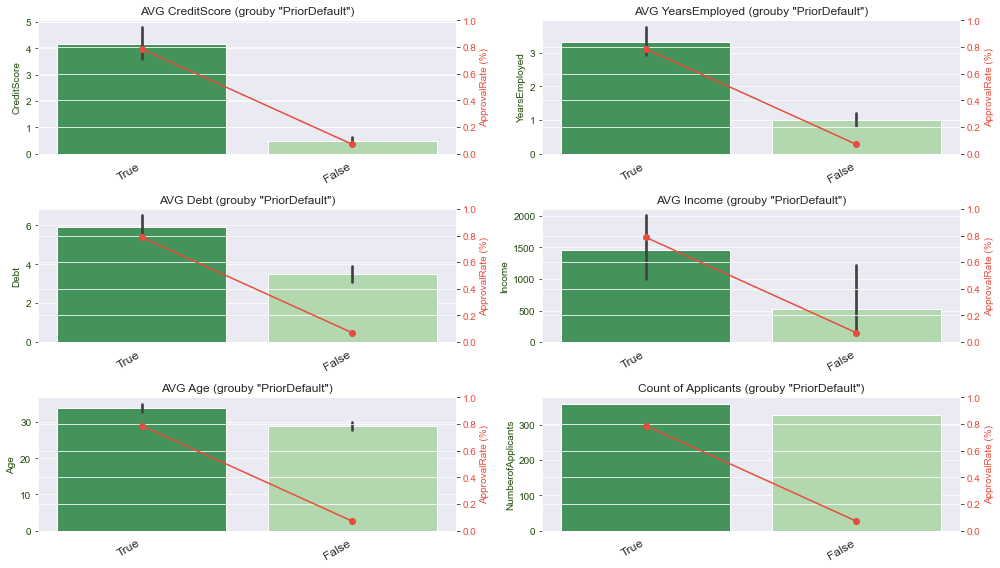

======================================================= Employed =======================================================


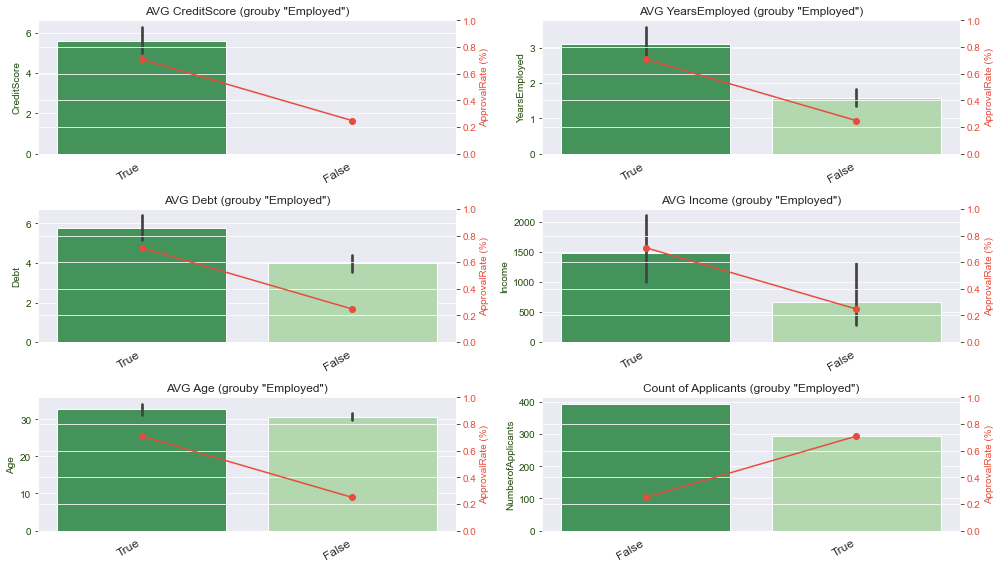

In [29]:
# plot the dual axis graph
primary = {'CreditScore':np.mean,
           'YearsEmployed':np.mean,
           'Debt':np.mean,
           'Income':np.mean,
           'Age':np.mean,
           'NumberofApplicants':np.count_nonzero}
secondary = {'ApprovalRate':np.mean}
title = ['AVG CreditScore', 'AVG YearsEmployed', 'AVG Debt',
         'AVG Income', 'AVG Age', 'Count of Applicants']
for col in ['PriorDefault', 'Employed']:
    print('='*55, col, '='*55)
    group = col
    dual_axis_analysis(df = df, 
                       group = group, 
                       primary = primary,
                       secondary = secondary,
                       title = title,
                       figure_size = (14, 8))

Insights:
- Average of `Age`, `Debt`, `YearsEmployed`, `CreditScore`, `Income` are relatively high for those applicants who don't have default status (`PriorDefault` = "True") and otherwise.
- Average of `Age`, `Debt`, `YearsEmployed`, `CreditScore`, `Income` are relatively high for those applicants who have employed (`Employed` = "True") and otherwise.
- `ApprovalRate` is very low for those applicants who haven't employed.
- `ApprovalRate` is very low for those applicants who have default status.
- The average `CreditScore` of applicants who haven't employed is zero. This tell us that applicants who have no jobs, their CC approval are most likely to be denied by the auditor since their `CreditScore` is absolute zero.

# Data preprocessing

Before we start the modeling process, we need to preprocess the data first. Here are some crucial preprocessing steps we need to conduct since we are going to use Logistic Regression model:
1. First, split the dataset into train and test sets so that there are no leakage information on test set when preprocessing train set.
2. On the train set, transform the values of numerical features (`num_columns`) in order to make those features are normally distributed.
3. On the train set, scale the values of numerical features (`num_columns`) using Standardization or Normalization so that they have the same variance and not bias to the large values.
4. On the train set, encode the values of non-numerical features (`cat_columns` or `cat_columns_significant`) into numerical form using one-hot encoding (for nominal features) or label encoding (for ordinal features).

We will perform transformation, scaling, and encoding steps implicitly using `sklearn.pipeline` module. This `pipeline` will make our code easier to read and reproducible.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

In [31]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('ApprovalStatus', axis = 1)
y = df[['ApprovalStatus']].replace({'Yes':1, 'No':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

print('X_train and y_train shapes: %s and %s' %(X_train.shape, y_train.shape))
print('X_test and y_test shapes: %s and %s' %(X_test.shape, y_test.shape))

X_train and y_train shapes: (517, 17) and (517, 1)
X_test and y_test shapes: (173, 17) and (173, 1)


In [32]:
# instantiate the transformer object
log_transformer = FunctionTransformer(lambda x: np.log(x + 1))
power_transformer = PowerTransformer(standardize = False)

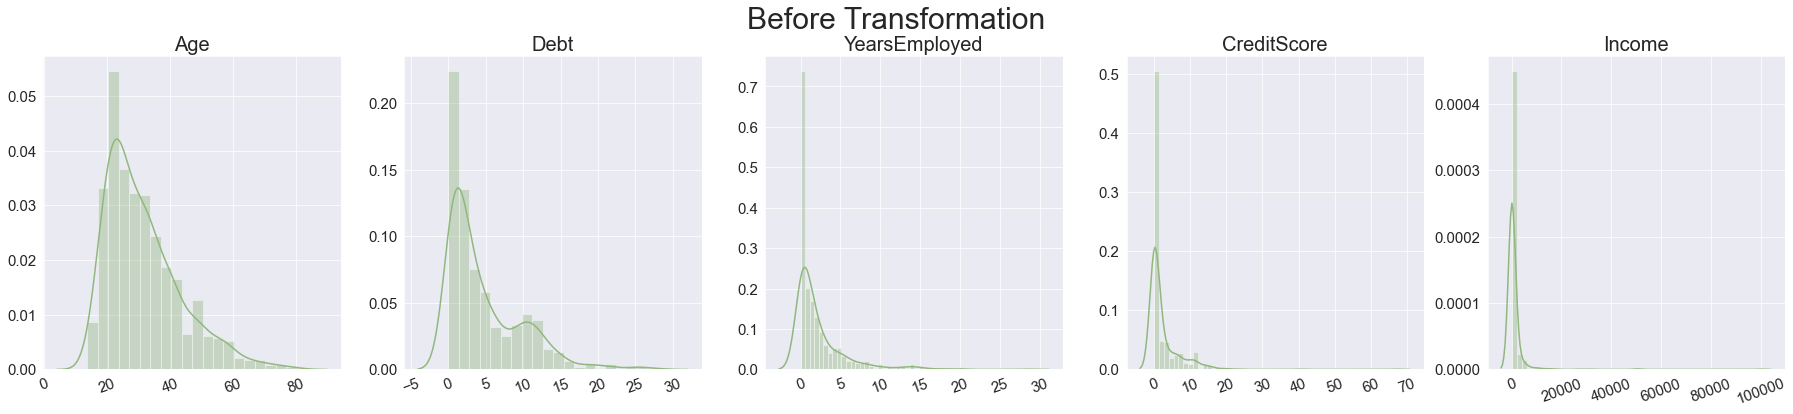

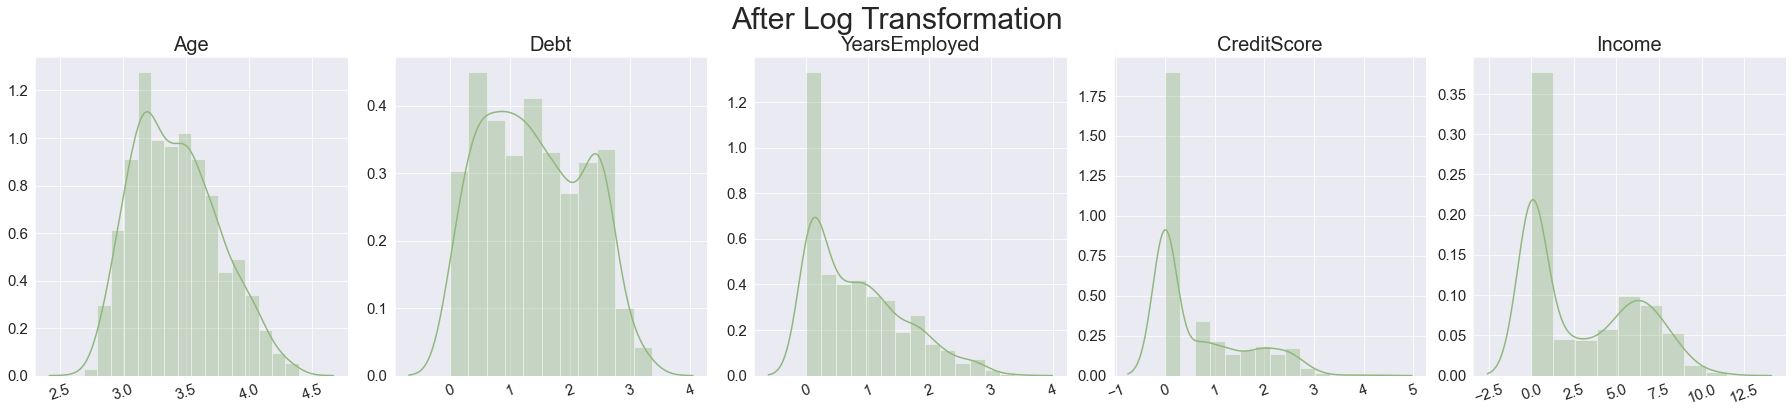

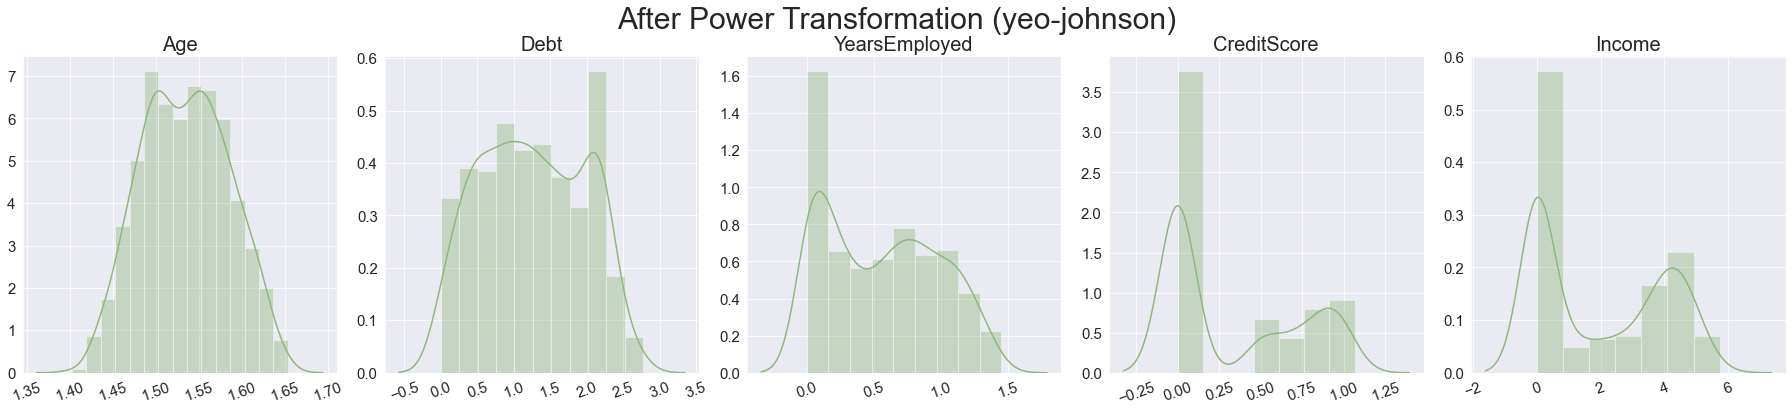

In [33]:
# check the data distribution with some transformation techniques
def show_histogram(data, name):
    fig = plt.figure(figsize = (25, 25))
    i = 1
    for col in data.columns:
        plt.subplot(5, 5, i)
        ax = sns.distplot(x = data[col], color = '#90B77D')
        ax.set(xlabel = None, ylabel = None)
        plt.title(str(col), loc = 'center', fontsize = 20)
        plt.xticks(rotation = 20, fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.tight_layout()
        i += 1
    plt.suptitle(name, fontsize = 30, y = 1.01, ha = 'center', va = 'top')
    plt.show()
    
show_histogram(df[num_columns], 
               'Before Transformation')
show_histogram(log_transformer.fit_transform(df[num_columns]), 
               'After Log Transformation')
show_histogram(pd.DataFrame(power_transformer.fit_transform(df[num_columns]), columns = num_columns), 
               'After Power Transformation (yeo-johnson)')

In [34]:
# remove 'ApprovalStatus' from 'cat_columns'
cat_columns = [col for col in cat_columns if col not in ['ApprovalStatus']]

# Modeling

## Baseline score

We see that our target class variable is nearly balance (`44.5%` are approved CC and `55.5%` are denied CC), therefore we won't perform any treatment to handle imbalanced class variable. We can also use `accuracy` as the model evaluation metric since this metric won't bias towards the majority class, denied CC.

A naive model is a model in which predicts all the CC applications to be approved. This simple model would be correct `44.5%` all of the time. Our models have to be more accurate than `44.5%` to add value to the business. Hence the `accuracy` score has to be better than `44.5%`.

In [35]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

ApprovalStatus
0                 0.555126
1                 0.444874
dtype: float64
ApprovalStatus
0                 0.554913
1                 0.445087
dtype: float64


## Baseline model

For the baseline model, we will train Logistic Regression algorithm on train set without hyperparameter tuning. Then evaluating its performance on the test set. 

We will try to build the baseline model using 2 kind of dataset, that is one with "all features" included (from `num_columns`  & `cat_columns`) and another one with "selected features" (from `num_columns`  & `cat_columns_significant`)

In [36]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# helper function to compute evaluation metric scores
def model_evaluation(model, name, tuning):
    """ This function is for evaluating the model performances after the model have been trained
    """
    print ('======== model evaluation metrics "{}" ========'.format(name))
    if tuning == True:
        CV_score = model.best_score_
        print('best CV scores:', round(CV_score, 3))
    else:
        pass
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train) # accuracy on train set
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)    # accuracy on test set
    print('accuracy train set:', round(accuracy_train, 3))         
    print('accuracy test set:', round(accuracy_test, 3))
    print('ROC AUC test set:', round(metrics.roc_auc_score(y_test, y_pred_proba_test), 3))
    print(metrics.confusion_matrix(y_test, y_pred_test))           # confusion matrix on test set
    print('classification report test set: \n{}'.format(metrics.classification_report(y_test, y_pred_test, target_names = ['Denied', 'Approved'])))
    return None

# helper function to get the features to be processed and not to be processed later in the pipeline
def select_features(numerical, nominal, ordinal):
    """ This function expect the column names of dataset as input argument, 
        then return the FunctionTransformer object
    """
    preprocess_numerical = FunctionTransformer(lambda x: x[numerical], validate = False)
    preprocess_nominal = FunctionTransformer(lambda x: x[nominal], validate = False)
    preprocess_ordinal = FunctionTransformer(lambda x: x[ordinal], validate = False)
    return preprocess_numerical, preprocess_nominal, preprocess_ordinal

# helper function to get the feature preprocessing pipeline
def create_feature_pipeline(numerical, nominal):
    """ This function expect the column names of dataset as input argument, 
        then return the Pipeline object in which contains preprocessing steps of features
    """
    preprocess_numerical, preprocess_nominal, preprocess_ordinal = select_features(numerical = numerical, 
                                                                                   nominal = nominal, 
                                                                                   ordinal = None)
    pl_numerical = Pipeline([('selector_numerical', preprocess_numerical),
                             ('transformer', log_transformer),
                             ('scaler', StandardScaler())])
    pl_nominal = Pipeline([('selector_nominal', preprocess_nominal),
                           ('encoder', OneHotEncoder(drop = 'first'))])
    feature_pipeline = FeatureUnion([('pipeline_numerical', pl_numerical),
                                     ('pipeline_nominal', pl_nominal)])
    return feature_pipeline

In [37]:
# create main pipeline: 'logreg_pipeline_1'
# using features from 'num_columns' and 'cat_columns'
feature_pipeline_1 = create_feature_pipeline(numerical = num_columns, nominal = cat_columns)                                      
logreg_pipeline_1 = Pipeline([('preprocessing_features', feature_pipeline_1),
                              ('LogReg', LogisticRegression(n_jobs = -1))])

# create main pipeline: 'logreg_pipeline_2'
# using features from 'num_columns' and 'cat_columns_significant'
feature_pipeline_2 = create_feature_pipeline(numerical = num_columns, nominal = cat_columns_significant)                                           
logreg_pipeline_2 = Pipeline([('preprocessing_features', feature_pipeline_2),
                              ('LogReg', LogisticRegression(n_jobs = -1))])

### Train and evaluate the model performances

We have created  2 pipeline, that is `logreg_pipeline_1` and `logreg_pipeline_2`. Now, these pipelines can be trained on train set and can be evaluated on test set.
> - `logreg_pipeline_1` is a pipeline of Logistic Regression model using "all features" (`num_columns`  & `cat_columns`)
> - `logreg_pipeline_2` is a pipeline of Logistic Regression model using "selected features" (`num_columns`  & `cat_columns_significant`)

In [38]:
# train 'logreg_pipeline_1' and evaluate the performance
logreg_pipeline_1.fit(X_train, y_train)

_ = model_evaluation(model = logreg_pipeline_1, 
                     name = 'LogReg (all features)', 
                     tuning = False)

======== model evaluation metrics "LogReg (all features)" ========
accuracy train set: 0.867
accuracy test set: 0.867
ROC AUC test set: 0.952
[[87  9]
 [14 63]]
classification report test set: 
              precision    recall  f1-score   support

      Denied       0.86      0.91      0.88        96
    Approved       0.88      0.82      0.85        77

    accuracy                           0.87       173
   macro avg       0.87      0.86      0.86       173
weighted avg       0.87      0.87      0.87       173



In [39]:
# train 'logreg_pipeline_2' and evaluate the performance
logreg_pipeline_2.fit(X_train, y_train)

_ = model_evaluation(model = logreg_pipeline_2, 
                     name = 'LogReg (selected features)', 
                     tuning = False)

======== model evaluation metrics "LogReg (selected features)" ========
accuracy train set: 0.872
accuracy test set: 0.867
ROC AUC test set: 0.953
[[86 10]
 [13 64]]
classification report test set: 
              precision    recall  f1-score   support

      Denied       0.87      0.90      0.88        96
    Approved       0.86      0.83      0.85        77

    accuracy                           0.87       173
   macro avg       0.87      0.86      0.86       173
weighted avg       0.87      0.87      0.87       173



Insights:
- It seems like both models perform in quite similar performance.
- Both accuracy scores are similar on the test set, but the model using "selected features" is more overfitting to the train set. This could be handled using regularization technique.
- Without hyperparameter tuning, we can get a pretty good model with `86.7%` accuracy! In fact, we have outperformed the baseline accuracy model which is `44.5%`.
- This also tell us that our CC approval dataset is likely to be linearly separable.

## Hyperparameter tuning

We will use `GridSearchCV` technique in order to find the best hyperparameter of Logistic Regression model so that we could get the better model performance. 5-fold CV is also used to handle the variability of splitting the dataset when searching for the best hyperparameter. Here are the hyperparameters to be tuned:
- `solver`: algorithm to use in the optimization of loss function.
- `penalty`: denotes regularizarion term.
- `C`: denotes (inverse) regularization strength.
- `class_weight`: weight to use in order to balance the class.

In [40]:
y_train.value_counts(normalize = True)

ApprovalStatus
0                 0.555126
1                 0.444874
dtype: float64

In [41]:
from sklearn.model_selection import GridSearchCV
# define the hyperparameter grid for logistic regression
logreg_params = {'LogReg__solver': ['liblinear'],
                 'LogReg__penalty': ['l1', 'l2', None],
                 'LogReg__C': np.logspace(-5, 5, 50),
                 'LogReg__class_weight':[{0:0.444874, 1:0.555126}, None]}

### Train and evaluate the model performances 

In [42]:
%%time
# train 'logreg_pipeline_1' and evaluate the performance using GridSearchCV
GS_logreg_pipeline_1 = GridSearchCV(logreg_pipeline_1, logreg_params, cv = 5, n_jobs = -1, scoring = 'accuracy')
GS_logreg_pipeline_1.fit(X_train, y_train)
print(GS_logreg_pipeline_1.best_params_, '\n')

_ = model_evaluation(model = GS_logreg_pipeline_1, 
                     name = 'LogReg (all features)', 
                     tuning = True)

{'LogReg__C': 0.19306977288832497, 'LogReg__class_weight': None, 'LogReg__penalty': 'l2', 'LogReg__solver': 'liblinear'} 

======== model evaluation metrics "LogReg (all features)" ========
best CV scores: 0.857
accuracy train set: 0.863
accuracy test set: 0.873
ROC AUC test set: 0.943
[[88  8]
 [14 63]]
classification report test set: 
              precision    recall  f1-score   support

      Denied       0.86      0.92      0.89        96
    Approved       0.89      0.82      0.85        77

    accuracy                           0.87       173
   macro avg       0.88      0.87      0.87       173
weighted avg       0.87      0.87      0.87       173

Wall time: 9.8 s


In [43]:
%%time
# train 'logreg_pipeline_2' and evaluate the performance using GridSearchCV
GS_logreg_pipeline_2 = GridSearchCV(logreg_pipeline_2, logreg_params, cv = 5, n_jobs = -1, scoring = 'accuracy')
GS_logreg_pipeline_2.fit(X_train, y_train)
print(GS_logreg_pipeline_2.best_params_, '\n')

_ = model_evaluation(model = GS_logreg_pipeline_2, 
                     name = 'LogReg (selected features)', 
                     tuning = True)

{'LogReg__C': 0.7906043210907702, 'LogReg__class_weight': None, 'LogReg__penalty': 'l1', 'LogReg__solver': 'liblinear'} 

======== model evaluation metrics "LogReg (selected features)" ========
best CV scores: 0.855
accuracy train set: 0.868
accuracy test set: 0.879
ROC AUC test set: 0.956
[[87  9]
 [12 65]]
classification report test set: 
              precision    recall  f1-score   support

      Denied       0.88      0.91      0.89        96
    Approved       0.88      0.84      0.86        77

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173

Wall time: 7.29 s


Insights:
- After performing hyperparameter tuning, training Logistic Regression using "selected features" gives us the best performance compared to training using "all features".
- Our model accuracy has increased from `86.7%` to `87.9%`.
- We will use tuned Logistic Regression using "selected features" as the final model.

## Select the best model: Trained Logistic Regression using "selected features"

Our best and final Logistic Regression model is saved in `GS_logreg_pipeline_2` object. Now we will interpret this model.

In [44]:
GS_logreg_pipeline_2.best_params_

{'LogReg__C': 0.7906043210907702,
 'LogReg__class_weight': None,
 'LogReg__penalty': 'l1',
 'LogReg__solver': 'liblinear'}

### Compare baseline and tuned model performance

In [45]:
# helper function to create confusion matrix
from sklearn.metrics import confusion_matrix
def create_confusion_matrix(model, name):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    # labels for confusion matrix
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['n = {:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{:.2%}'.format(value) for value in cf_matrix.flatten()/sum(cf_matrix.flatten())]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.array(labels).reshape(2,2)

    # create heatmap of confusion matrix
    fix, ax = plt.subplots(figsize=(5,4))
    ax = sns.heatmap(cf_matrix, annot = labels,
                     xticklabels = ['Predicted as\nDenied','Predicted as\nApproved'],
                     yticklabels = ['Actual: Denied','Actual: Approved'],
                     annot_kws = {"size": 10}, linewidths = 0.1,
                     fmt = '', cmap = 'Greens')

    ax.set_title('Confusion matrix of {}'.format(name), fontsize = 12,  fontweight = 'bold')
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'center', rotation = 0)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
    plt.show()
    return None

# helper function to create ROC curve
from sklearn.metrics import roc_curve
def plot_ROC_curve(model_to_plot):
    fig, ax = plt.subplots(figsize = (8, 5))
    fpr_roc = dict()
    tpr_roc = dict()
    for name, model in model_to_plot.items():
        # generate ROC curve values
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        fpr_roc[name] = fpr
        tpr_roc[name] = tpr
    # plot ROC curve
    for name, model in model_to_plot.items():
        ax.plot(fpr_roc[name], tpr_roc[name], label = name)
    ax.plot([0, 1], [0, 1], 'k--')
    # plt.autoscale(enable = True, axis = 'x', tight = True)
    # plt.autoscale(enable = True, axis = 'y', tight = True)    
    ax.set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate', title = 'ROC Curve')
    plt.legend()
    plt.show()
    return None

# helper function to create Precision-Recall curve
from sklearn.metrics import precision_recall_curve
def plot_PR_curve(model_to_plot):
    fig, ax = plt.subplots(figsize = (8, 5))
    precision = dict()
    recall = dict()
    for name, model in model_to_plot.items():
        # generate Precision-Recall curve values
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob)
        precision[name] = prec
        recall[name] = rec
    # plot Precision-Recall curve
    for name, model in model_to_plot.items():
        ax.plot(recall[name], precision[name], label = name)
    ax.plot([0, 1], [0, 0], 'k--')
    # plt.autoscale(enable = True, axis = 'x', tight = True)
    # plt.autoscale(enable = True, axis = 'y', tight = True)    
    ax.set(xlabel = 'Recall', ylabel = 'Precision', title = 'Precision-Recall Curve')
    plt.legend()
    plt.show()
    return None

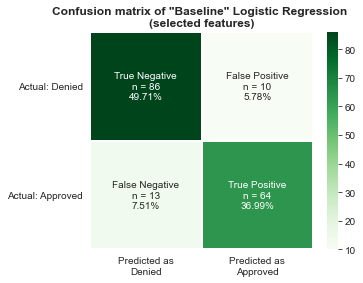

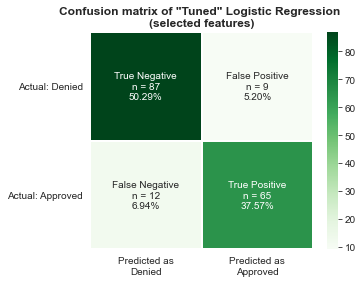

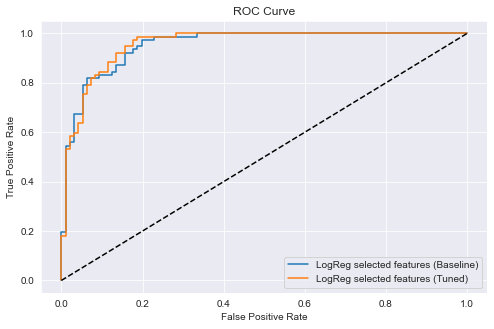

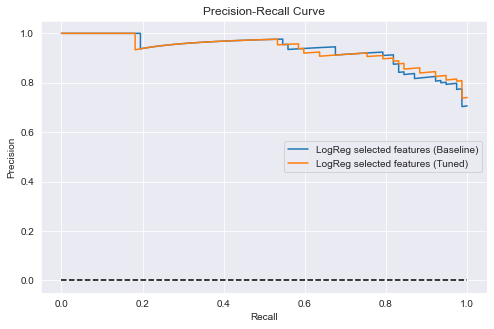

In [46]:
# create confusion matrix of the best model
create_confusion_matrix(logreg_pipeline_2, '"Baseline" Logistic Regression \n(selected features)')
create_confusion_matrix(GS_logreg_pipeline_2, '"Tuned" Logistic Regression \n(selected features)')

# plot the ROC curve
plot_ROC_curve(model_to_plot = {'LogReg selected features (Baseline)':logreg_pipeline_2, 
                                'LogReg selected features (Tuned)':GS_logreg_pipeline_2})

# plot the Precision-Recall curve
plot_PR_curve(model_to_plot = {'LogReg selected features (Baseline)':logreg_pipeline_2, 
                               'LogReg selected features (Tuned)':GS_logreg_pipeline_2})

### Model's coefficients

Note that the learned coefficient values of Logistic Regression are in the log-odds values. We need to convert them first if we want to interpret their probability or odds values. Here are the formula we can use for the conversion of log-odds into odds and probability.

$$ log(odds) = log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + ... + \beta_N x_N $$
$$ odds = \frac{p}{1-p} = e^{log(odds)} $$
$$ p = \frac{e^{log(odds)}}{1 + e^{log(odds)}} $$


In [47]:
# get the predictor variable used in model 'GS_logreg_pipeline_2'
scaled_columns = GS_logreg_pipeline_2.estimator[0].transformer_list[0][1][2].feature_names_in_.tolist()
onehot_columns = GS_logreg_pipeline_2.estimator[0].transformer_list[1][1][1].get_feature_names_out().tolist()

# get the model coefficient and intercept usde in model
coefficient = GS_logreg_pipeline_2.estimator[1].coef_
intercept = GS_logreg_pipeline_2.estimator[1].intercept_

# create a dataframe that holds coefficient and intercept values of the model
model_learned_params = pd.DataFrame({'Feature': scaled_columns+onehot_columns,
                                     'Intercept':intercept[0],
                                     'Coefficient (log-odds)':coefficient[0]})                                
model_learned_params['Coefficient (odds)'] = model_learned_params['Coefficient (log-odds)'].apply(lambda x: np.exp(x))
model_learned_params['Coefficient (proba)'] = model_learned_params['Coefficient (log-odds)'].apply(lambda x: np.exp(x)/(1+np.exp(x)))
model_learned_params = model_learned_params.sort_values('Coefficient (proba)', ascending = False)

In [48]:
# coef in numerical features
model_learned_params[model_learned_params.Feature.isin(num_columns)]

,Feature,Intercept,Coefficient (log-odds),Coefficient (odds),Coefficient (proba)
3,CreditScore,-1.49918,0.662486,1.939608,0.659819
4,Income,-1.49918,0.457445,1.580032,0.612408
2,YearsEmployed,-1.49918,0.329279,1.389965,0.581584
0,Age,-1.49918,0.002648,1.002651,0.500662
1,Debt,-1.49918,-0.003861,0.996146,0.499035


In [49]:
# coef in categorical features
model_learned_params[~model_learned_params.Feature.isin(num_columns)]

,Feature,Intercept,Coefficient (log-odds),Coefficient (odds),Coefficient (proba)
30,PriorDefault_True,-1.49918,2.551883,12.831245,0.927700
32,Citizen_p,-1.49918,1.913587,6.777353,0.871422
21,EducationLevel_x,-1.49918,1.232589,3.430099,0.774271
10,EducationLevel_cc,-1.49918,0.984892,2.677524,0.728078
7,BankCustomer_gg,-1.49918,0.806230,2.239449,0.691306
26,Ethnicity_n,-1.49918,0.745883,2.108302,0.678281
25,Ethnicity_j,-1.49918,0.408555,1.504642,0.600741
18,EducationLevel_q,-1.49918,0.387786,1.473714,0.595750
33,Citizen_s,-1.49918,0.311436,1.365385,0.577236
20,EducationLevel_w,-1.49918,0.272330,1.313020,0.567665


Insights:
- For numerical features, 
    - We see that `CreditScore`, `Income`, and `YearsEmployed` have odds values greater than 1 significantly compared to `Age`. This means as their value increasing, then the probability and odds of getting approved for a CC application is increasing. This looks like reasonable decision of how is bank auditing their applicants on CC. While `Age` has odds value close to 1 meaning that this feature is not meaningful for CC approval decision.
    - `Debt` has odds value less than 1. This means as its value increasing, then the probability and odds for approved CC application is decreasing. Yet the odds value is near to 1, so it might not be useful to audit the CC application using this feature.
- For categorical features,
    - It looks like `PriorDefault_True` is the most important feature on decision making of approving CC application (the greatest odds values). As the CC applicants not in default status (`PriorDefault_True = 1`), their CC application are most likely to be approved.
    - Some of the values from `Citizen`, `EducationLevel`, `BankCustomer`, and `Ethnicity` features may increase the probability and odds of getting approved CC and some of them may not too.
    - `Employed_True ` also increases the odds of getting approved CC if the applicants have a job.

### Model's SHAP values

- Based on the feature importance using mean of SHAP values, `PriorDefault_True`, `CreditScore`, `Income`, and `YearsEmployed` are the most important features in deciding CC to be approved. The higher those values then the higher the odds of getting approved on CC application. This also applies to `Employed_True`.
- Unfortunately we can't interpret those anonymized features. But one thing for sure, higher education level should increases the odds of getting approved CC.

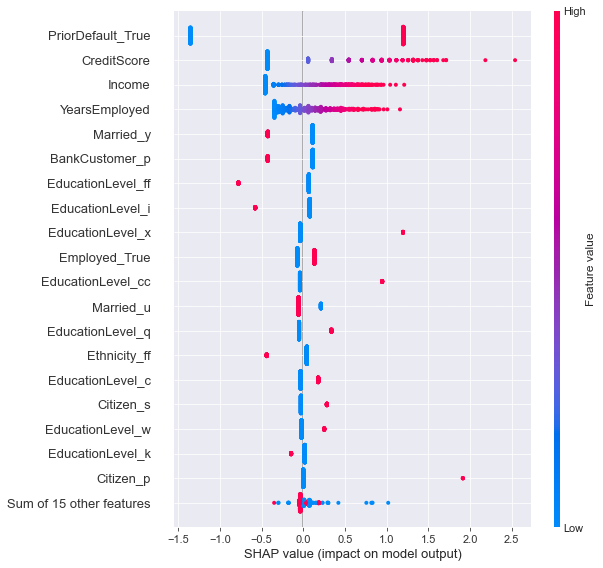

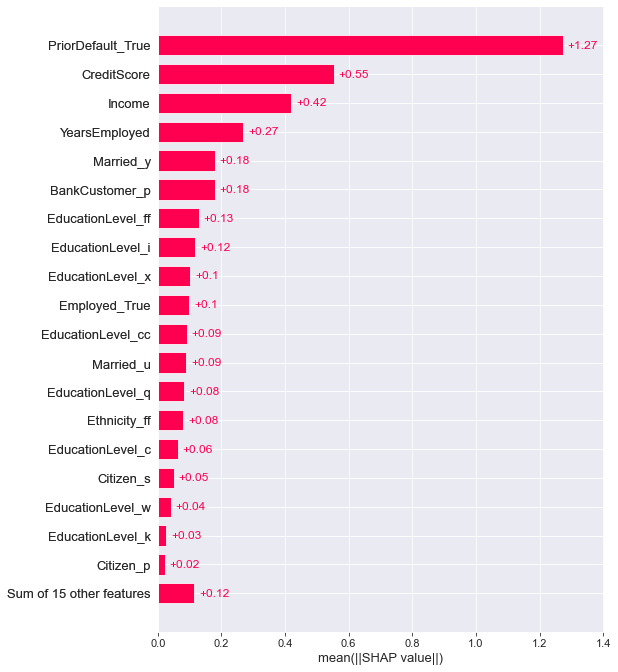

In [50]:
import shap
# get the the preprocessed train set using 'GS_logreg_pipeline_2' pipeline
X_train_preprocessed = GS_logreg_pipeline_2.estimator[0].transform(X_train).toarray()

# compute SHAP values of each feature in X_train_preprocessed data
shap.initjs()
explainer = shap.Explainer(GS_logreg_pipeline_2.estimator[1], 
                           X_train_preprocessed, 
                           feature_names = scaled_columns + onehot_columns)
shap_values = explainer(X_train_preprocessed)

# plot SHAP values of each feature in X_train_preprocessed data as beeswarm plot
shap.plots.beeswarm(shap_values, max_display = 20)
                   
# plot the feature importance base on absolute SHAP values
shap.plots.bar(shap_values.abs, max_display = 20)

# Conclusions

1. We have successfully built a machine learning model using Logistic Regression algorithm to predict if a credit card application will get approved or not. Even though we only use a simple linear model, the accuracy of this model is pretty good. This model has `87.9%` accuracy score and significantly outperform baseline accuracy score, `44.5%`. This model is trained using "selected features" train set and also has been tuned.
2. Based on the coefficients of Logistic Regression and the SHAP values, `CreditScore`, `Income`, and `YearsEmployed` are the most important numerical features and `PriorDefault_True` are the most important categorical feature. These four features positively affect the outcome and as these values increase, so does the probability and odds that a credit card application will be approved. These could be the main driver of approving credit card application by the auditors. Also these relationships make sense for us, so there is no something odd here.
3. Some of the features such as `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, and `Citizen` are hardly to interpret since their value names are anonymized. But if we look at the SHAP values, some of those feature values give an impact on approving credit card application.
4. We also found that for those credit card applicants who haven't employed, their `CreditScore` values are `0`s. This tell us that their credit card approval are most likely to be denied by the auditor.

# References

1. [Analysis of Credit Approval Data](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)
2. [How to Interpret the Logistic Regression model — with Python](https://medium.com/analytics-vidhya/how-to-interpret-the-logistic-regression-model-with-python-2bacfb50e223)